In [7]:
import pandas as pd
import numpy as np

# Read CSV files
times_df = pd.read_csv("morrisonhighresquarriesdates.csv").drop_duplicates()
edges_df = pd.read_csv("morrisonhighresedges.csv")
times_df = times_df.reset_index(drop=True)
times_df.columns = ['from', 'time_foster', 'time_turner', 'time_maidment']
times_df

,from,time_foster,time_turner,time_maidment
0,Bone Cabin Quarry,Zone 2,2,6
1,Cleveland-Lloyd Quarry,Zone 5,3,4
2,Cope's Nipple,Zone 6,4,5
3,Dinosaur National Monument Quarry,Zone 5,3,4
4,Dry Mesa Quarry,Zone 4,2,4
5,FPA General,Zone 4,na,4
6,Hanksville-Burpee Quarry,Zone 4,2,4
7,Howe Quarry,Zone 2,2,5
8,Howe-Stephens Quarry,Zone 2,na,5
9,Little Houston Quarry,Zone 2,2,6


In [8]:
edges_df

,from,to,weight
0,Bone Cabin Quarry,class 10non-selective grazergraviportal,1
1,Bone Cabin Quarry,class 11non-selective browserGraviportal,1
2,Bone Cabin Quarry,class 11non-selective grazergraviportal,1
3,Bone Cabin Quarry,class 11non-selective mixed feedergraviportal,2
4,Bone Cabin Quarry,class 13non-selective grazerGraviportal,1
...,...,...,...
150,Stovall Quarry 1,class 11non-selective browserGraviportal,1
151,Stovall Quarry 1,class 13non-selective grazerGraviportal,1
152,Stovall Quarry 1,class 15non-selective browsergraviportal,1
153,Stovall Quarry 1,class 7non-selective mixed feedersub-cursorial,1


In [9]:
edges_df = edges_df.merge(times_df, on='from', how='left')
edges_df

,from,to,weight,time_foster,time_turner,time_maidment
0,Bone Cabin Quarry,class 10non-selective grazergraviportal,1,Zone 2,2,6
1,Bone Cabin Quarry,class 11non-selective browserGraviportal,1,Zone 2,2,6
2,Bone Cabin Quarry,class 11non-selective grazergraviportal,1,Zone 2,2,6
3,Bone Cabin Quarry,class 11non-selective mixed feedergraviportal,2,Zone 2,2,6
4,Bone Cabin Quarry,class 13non-selective grazerGraviportal,1,Zone 2,2,6
...,...,...,...,...,...,...
150,Stovall Quarry 1,class 11non-selective browserGraviportal,1,Zone 5,3,5
151,Stovall Quarry 1,class 13non-selective grazerGraviportal,1,Zone 5,3,5
152,Stovall Quarry 1,class 15non-selective browsergraviportal,1,Zone 5,3,5
153,Stovall Quarry 1,class 7non-selective mixed feedersub-cursorial,1,Zone 5,3,5


In [10]:
edges_df['time_foster'] = edges_df['time_foster'].str.extract('(\d+)').astype(int)
edges_df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/ty/5bvjyd1n4dx2ymnhbn1s9579brngf7/T/ipykernel_26955/3176716115.py:1: SyntaxWarning: invalid escape sequence '\d'
  edges_df['time_foster'] = edges_df['time_foster'].str.extract('(\d+)').astype(int)


,from,to,weight,time_foster,time_turner,time_maidment
0,Bone Cabin Quarry,class 10non-selective grazergraviportal,1,2,2,6
1,Bone Cabin Quarry,class 11non-selective browserGraviportal,1,2,2,6
2,Bone Cabin Quarry,class 11non-selective grazergraviportal,1,2,2,6
3,Bone Cabin Quarry,class 11non-selective mixed feedergraviportal,2,2,2,6
4,Bone Cabin Quarry,class 13non-selective grazerGraviportal,1,2,2,6
...,...,...,...,...,...,...
150,Stovall Quarry 1,class 11non-selective browserGraviportal,1,5,3,5
151,Stovall Quarry 1,class 13non-selective grazerGraviportal,1,5,3,5
152,Stovall Quarry 1,class 15non-selective browsergraviportal,1,5,3,5
153,Stovall Quarry 1,class 7non-selective mixed feedersub-cursorial,1,5,3,5


In [11]:
edges_df.to_csv("morrisonhighresedges_new.csv", index=False)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from infomap import Infomap
import networkx as nx
import numpy as np

# load csv
csv_path = "morrisonhighresedges_new.csv" 
time_col= "time_foster" # one of: 'foster', 'turner', 'maidment'
df = pd.read_csv(csv_path)

# map node names to int
unique_nodes = pd.unique(df[['from', 'to']].values.ravel())
node_map = {name: i for i, name in enumerate(unique_nodes)}
reverse_node_map = {i: name for name, i in node_map.items()}

# build network with infomap
im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5 --num-trials 100")

for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    weight = float(row["weight"])
    im.add_link(u, v, weight)

im.run()

# id modules
modules = {node.node_id: node.module_id for node in im.nodes}
name_modules = {reverse_node_map[node_id]: mod for node_id, mod in modules.items()}

# sort data for plotting
zone_order = sorted(df[time_col].unique())
zone_map = {zone: i + 1 for i, zone in enumerate(zone_order)}

node_modules = []
for name in unique_nodes:
    time = df[df['from'] == name][time_col].values
    if len(time) == 0:
        time = df[df['to'] == name][time_col].values
    time = time[0] if len(time) > 0 else "Zone 0"
    module = name_modules[name]
    node_modules.append((name, module, zone_map.get(time, 0)))

plot_df = pd.DataFrame(node_modules, columns=["node", "module", "zone"])

# make networkx graph
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    G.add_edge(u, v, weight=row["weight"])

# Assign module as a node attribute
nx.set_node_attributes(G, modules, "module")

  Infomap v2.8.0 starts at 2025-05-07 17:59:54
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
                    markov-time = 0.3
                    preferred-number-of-modules = 5
                    num-trials = 100
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1.000000000, sum link flow: 1.000000000
Build internal network with 44 nodes and 155 links...
  -> Rescale link flow with global Markov time 0.300000000
  -> One-level codelength: 5.109846033

Trial 1/100 starting at 2025-05-07 17:59:54
Two-level compression: 20.87% 1.56% 0.195225415% 0.314291220% 
Partitioned to codelength 0.425761240 + 3.534235415 + 0.000000000 = 3.959996655 in 5 modules.

=> Trial 1/100 finished in 0.000694208s with codelength 3.959996655

Trial 2/100 starting at 2025-05-07 17:59:54
Two-level compression: 21.49% 1.30% 0.144203255% 

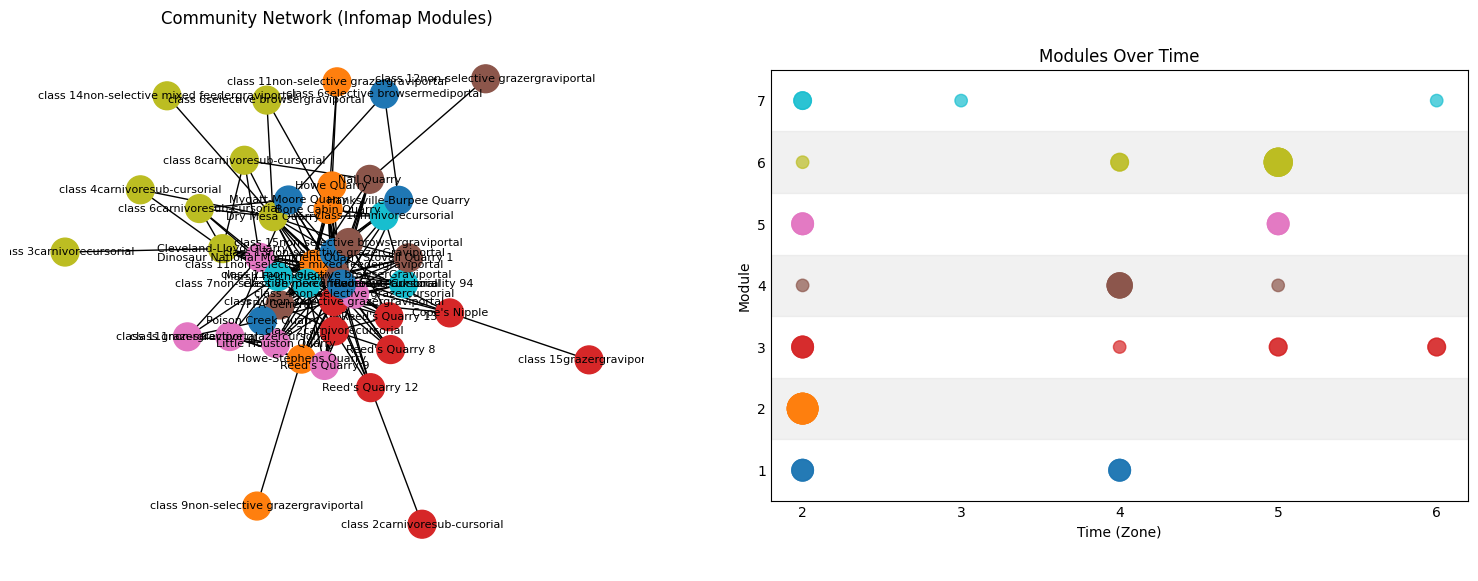

In [13]:

# plot network and stepped scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# network plot
pos = nx.spring_layout(G, seed=42)
node_colors = [modules[n] for n in G.nodes()]
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.tab10, node_size=400, with_labels=False, ax=ax1)
nx.draw_networkx_labels(G, pos, labels={node_map[name]: name for name in unique_nodes}, font_size=8, ax=ax1)
ax1.set_title("Community Network (Infomap Modules)")

# stepped plot

# Calculate the number of nodes for each (zone, module) pair
size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')

# Merge this data back into the plot dataframe
plot_df = plot_df.merge(size_data, on=["zone", "module"])

# make the plot
module_ids = sorted(plot_df["module"].unique())
for module_id in module_ids:
    if module_id % 2 == 0:
        ax2.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

scatter = ax2.scatter(
    plot_df["zone"], plot_df["module"],
    s=plot_df["node_count"] * 80,  
    c=plot_df["module"], cmap="tab10", alpha=0.7
)

ax2.set_xlabel("Time (Zone)")
ax2.set_ylabel("Module")
ax2.set_title("Modules Over Time")

# Set x-ticks and labels
ax2.set_xticks(list(zone_map.values()))
ax2.set_xticklabels(list(zone_map.keys()))

# Set y-ticks at integer module IDs
ax2.set_yticks(module_ids)

# remove tick marks keep labels
ax2.tick_params(axis='both', which='both', length=0)

# set ylim
ax2.set_ylim(min(module_ids) - 0.5, max(module_ids) + 0.5)

# Remove gridlines
ax2.grid(False)

# Adjust plot layout
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + 0.1, box.width * 1.1, box.height * 0.8])

plt.show()

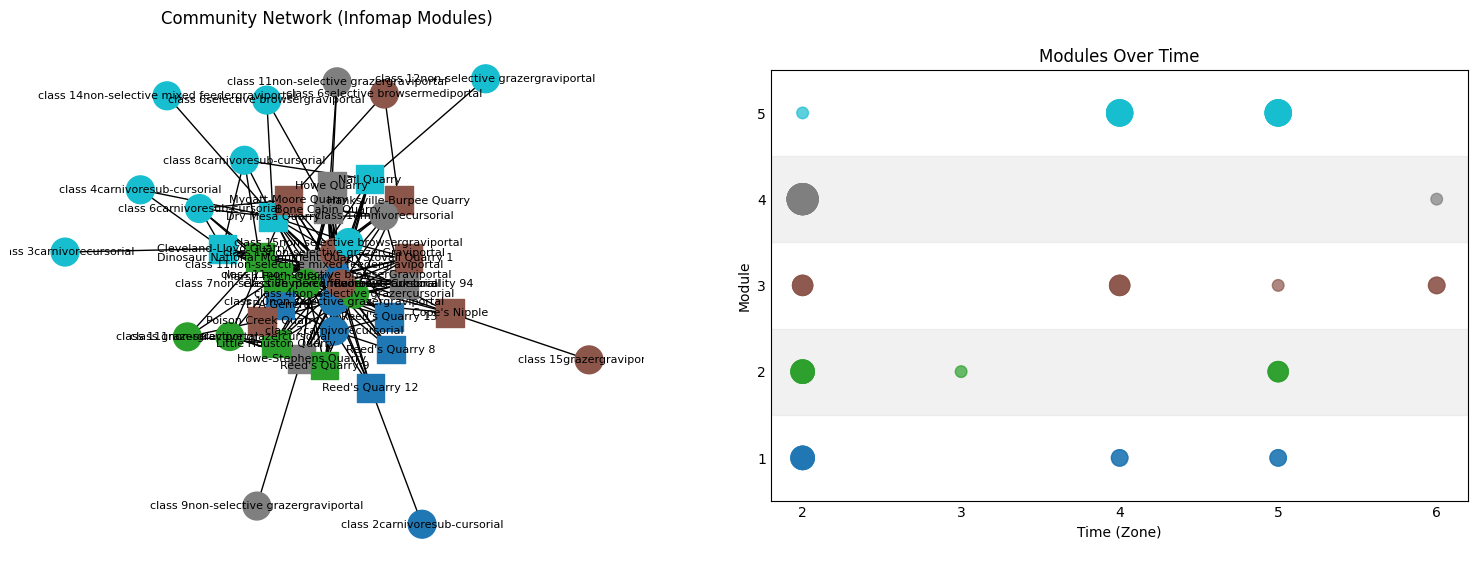

In [37]:
# plot network and stepped scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# ---- NETWORK PLOT ----

# Assign shapes based on 'from' and 'to'
node_shapes = {}
for _, row in df.iterrows():
    node_shapes[node_map[row["to"]]] = "circle"  # Default to 'to'
    node_shapes[node_map[row["from"]]] = "square"  # Overwrite with 'from' if needed

# Group nodes by shape
square_nodes = [n for n, shape in node_shapes.items() if shape == "square"]
circle_nodes = [n for n, shape in node_shapes.items() if shape == "circle"]

# Node positions
pos = nx.spring_layout(G, seed=42)

# Draw edges
nx.draw_networkx_edges(G, pos, ax=ax1)

# Draw square nodes ("from")
nx.draw_networkx_nodes(
    G, pos,
    nodelist=square_nodes,
    node_shape='s',
    node_color=[modules[n] for n in square_nodes],
    cmap=plt.cm.tab10,
    node_size=400,
    ax=ax1
)

# Draw circle nodes ("to")
nx.draw_networkx_nodes(
    G, pos,
    nodelist=circle_nodes,
    node_shape='o',
    node_color=[modules[n] for n in circle_nodes],
    cmap=plt.cm.tab10,
    node_size=400,
    ax=ax1
)

# Draw labels
nx.draw_networkx_labels(G, pos, labels={node_map[name]: name for name in unique_nodes}, font_size=8, ax=ax1)

# Title
ax1.set_title("Community Network (Infomap Modules)")

# ---- STEPPED SCATTER PLOT ----

# Calculate the number of nodes for each (zone, module) pair
size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')
plot_df = plot_df.merge(size_data, on=["zone", "module"])

# Background shading for modules
module_ids = sorted(plot_df["module"].unique())
for module_id in module_ids:
    if module_id % 2 == 0:
        ax2.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

# Plot scatter with size reflecting node count
scatter = ax2.scatter(
    plot_df["zone"], plot_df["module"],
    s=plot_df["node_count"] * 70,
    c=plot_df["module"], cmap="tab10", alpha=0.7
)

# Axis labels and title
ax2.set_xlabel("Time (Zone)")
ax2.set_ylabel("Module")
ax2.set_title("Modules Over Time")

# X/Y ticks and labels
ax2.set_xticks(list(zone_map.values()))
ax2.set_xticklabels(list(zone_map.keys()))
ax2.set_yticks(module_ids)

# Clean up axes
ax2.tick_params(axis='both', which='both', length=0)
ax2.set_ylim(min(module_ids) - 0.5, max(module_ids) + 0.5)
ax2.grid(False)

# Remove the black border from the network graph
for spine in ax1.spines.values():
    spine.set_visible(False)

# Layout adjustment
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + 0.1, box.width * 1.1, box.height * 0.8])

plt.show()


#### Alternative size calssification test

In [ ]:
df2 = df

# load csv
csv_path = "drymesahighsize.csv" 
df = pd.read_csv(csv_path)

zone_dict = dict(zip(df2['from'], df2['time']))
# add column to df called time which uses the zone_dict to map the from column to the time column
df['time'] = df['from'].map(zone_dict)
# make unmapped values Zone 0
df['time'] = df['time'].fillna('Zone 0')
df.to_csv("drymesahighsize.csv", index=False)

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from infomap import Infomap
import networkx as nx
import numpy as np

# load csv
csv_path = "drymesahighsize.csv" 
df = pd.read_csv(csv_path)

# map node names to int
unique_nodes = pd.unique(df[['from', 'to']].values.ravel())
node_map = {name: i for i, name in enumerate(unique_nodes)}
reverse_node_map = {i: name for name, i in node_map.items()}

# build network with infomap
im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5")

for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    weight = float(row["weight"])
    im.add_link(u, v, weight)

im.run()

# id modules
modules = {node.node_id: node.module_id for node in im.nodes}
name_modules = {reverse_node_map[node_id]: mod for node_id, mod in modules.items()}

# sort data for plotting
zone_order = sorted(df['time'].unique())
zone_map = {zone: i + 1 for i, zone in enumerate(zone_order)}

node_modules = []
for name in unique_nodes:
    time = df[df['from'] == name]['time'].values
    if len(time) == 0:
        time = df[df['to'] == name]['time'].values
    time = time[0] if len(time) > 0 else "Zone 0"
    module = name_modules[name]
    node_modules.append((name, module, zone_map.get(time, 0)))

plot_df = pd.DataFrame(node_modules, columns=["node", "module", "zone"])

# make networkx graph
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    G.add_edge(u, v, weight=row["weight"])

# Assign module as a node attribute
nx.set_node_attributes(G, modules, "module")

  Infomap v2.8.0 starts at 2025-04-28 10:52:58
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
                    markov-time = 0.3
                    preferred-number-of-modules = 5
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 51 nodes and 151 links...
  -> Rescale link flow with global Markov time 0.3
  -> One-level codelength: 5.1655356

Trial 1/1 starting at 2025-04-28 10:52:58
Two-level compression: -1.8% 24% 
Partitioned to codelength 0.404374636 + 3.56544151 + 0 = 3.969816142 in 5 modules.

=> Trial 1/1 finished in 0.000305708s with codelength 3.96981614


Summary after 1 trial
Best end modular solution in 2 levels:
Per level number of modules:         [          5,           0] (sum: 5)
Per level number of leaf nodes:      [          0,          51] (sum: 

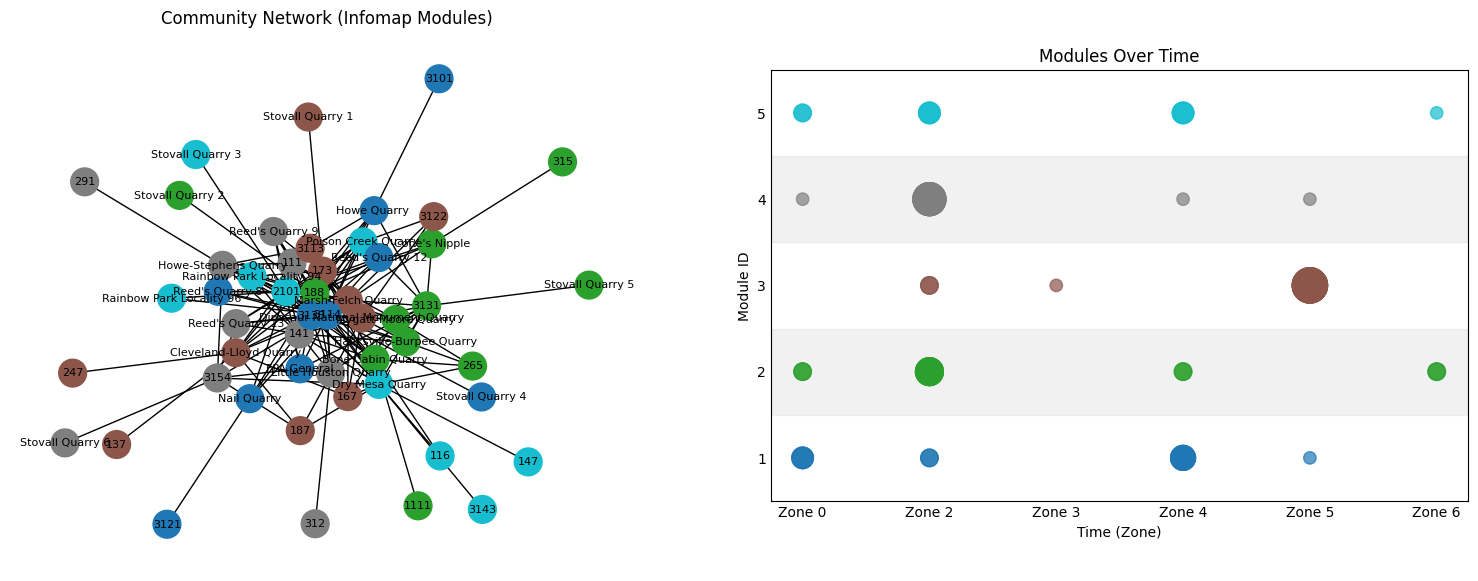

In [ ]:

# plot network and stepped scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# network plot
pos = nx.spring_layout(G, seed=42)
node_colors = [modules[n] for n in G.nodes()]
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.tab10, node_size=400, with_labels=False, ax=ax1)
nx.draw_networkx_labels(G, pos, labels={node_map[name]: name for name in unique_nodes}, font_size=8, ax=ax1)
ax1.set_title("Community Network (Infomap Modules)")

# stepped plot

# Calculate the number of nodes for each (zone, module) pair
size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')

# Merge this data back into the plot dataframe
plot_df = plot_df.merge(size_data, on=["zone", "module"])

# make the plot
mmodule_ids = sorted(plot_df["module"].unique())
for module_id in module_ids:
    if module_id % 2 == 0:
        ax2.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

scatter = ax2.scatter(
    plot_df["zone"], plot_df["module"],
    s=plot_df["node_count"] * 80,  
    c=plot_df["module"], cmap="tab10", alpha=0.7
)

ax2.set_xlabel("Time (Zone)")
ax2.set_ylabel("Module")
ax2.set_title("Modules Over Time")

# Set x-ticks and labels
ax2.set_xticks(list(zone_map.values()))
ax2.set_xticklabels(list(zone_map.keys()))

# Set y-ticks at integer module IDs
ax2.set_yticks(mmodule_ids)

# remove tick marks keep labels
ax2.tick_params(axis='both', which='both', length=0)

# set ylim
ax2.set_ylim(min(mmodule_ids) - 0.5, max(mmodule_ids) + 0.5)

# Remove gridlines
ax2.grid(False)

# Adjust plot layout
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + 0.1, box.width * 1.1, box.height * 0.8])

plt.show()